## Course 1: Les fondements de l’apprentissage machine
### Author: Ricardo Vallejo


Soit l’ensemble des données Iris qui comprend 150 observations de fleurs
d’iris décrites par la longueur et la largeur des sépales et des pétales. Trois espèces différentes sont incluses Iris setosa, Iris versicolor et Iris virginica

In [1]:
# https://www.kaggle.com/ar2017/basics-of-feature-selection-with-python
# https://www.kaggle.com/danalexandru/simple-analysis-of-iris-dataset
# https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b


# Deep Learning 
# https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
    

# 1.  Load Data

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

# 1. Téléchargez le contenu de la base de données iris

data = pd.read_csv("iris.csv")
pd.set_option('display.max_rows', None)
display(data)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### 1.1.  Identify Classes et Features

In [32]:
fn = ['sepal_length','sepal_width', 'petal_length','petal_width'] #Features ou characteristics

In [33]:
cn = ['setosa', 'versicolor', 'virginica'] #Classes

### 1.2. Check the distribution or instances of any class


In [34]:
data.groupby('species').size()  #Class species ALL DATA

species
setosa        50
versicolor    50
virginica     50
dtype: int64

## 2. Split data in Training Data and Test Data

We can split the dataset into a training set and a test set. Usually, we should also have a validation set

In [35]:
#Repartition des donnes - I have to do that after preprocessing and imputation null values

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.5, stratify = data['species'], random_state = 10) #40% data for tests


In [36]:
train.groupby('species').size() #SPLITED DATA TRAINING

species
setosa        25
versicolor    25
virginica     25
dtype: int64

In [37]:
test.groupby('species').size() #SPLITED DATA TESTS

species
setosa        25
versicolor    25
virginica     25
dtype: int64

## Creation de matrices des characteristiques

In [38]:
# In order to do references to feature data Test and Training easily we create Matrix of charactersitics

X_train = train [['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_train = train[['species']]

X_test = test[['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_test = test[['species']]



# 3. Exploratory Data Analysis

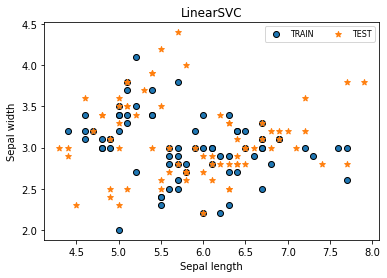

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Sur l'axe des x on aura Sepal length et sur l'axe de y Sepal width
# On a trois couleurs pour les trois espèces
# et deux marker pour entrainement et test
a=plt.scatter(X_train['sepal_length'], X_train['sepal_width'], label="train", edgecolors='k', cmap=plt.cm.coolwarm)
b=plt.scatter(X_test['sepal_length'], X_test['sepal_width'], label="test", marker='*', cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

plt.legend((a, b),
           ('TRAIN', 'TEST'),
           scatterpoints=1,
    #       loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()

## 3.1. Visualisation of data distribution

<Figure size 1440x1080 with 0 Axes>

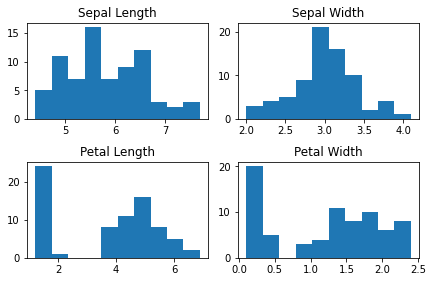

In [40]:
# Visualisation of data distribution

n_bins = 10

plt.figure(figsize = (20,15))
fig, axs = plt.subplots(2, 2)

axs[0,0].hist(X_train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');

axs[0,1].hist(X_train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');

axs[1,0].hist(X_train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');

axs[1,1].hist(X_train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# add some spacing between subplots
fig.tight_layout(pad=1.0);

Observations:

    Both petal_length and petal_width, there seems to be a group of data points that have smaller values than the others
    suggesting that there might be different groups in this data.
    
    Petal length and petal width seem to diverge from the normal distribution.

We can do numerical analysis for this type of conclusion:

In [41]:
import scipy.stats as stats

for param in ['sepal_length','sepal_width', 'petal_length','petal_width']:
    z, pval = stats.normaltest(data[param])
    #print(z)
    if(pval < 0.055):
        print("%s has a p-value of %f - distribution is not normal" % (param, pval))
    else:
        print("%s has a p-value of %f" % (param, pval))

sepal_length has a p-value of 0.056824
sepal_width has a p-value of 0.167241
petal_length has a p-value of 0.000000 - distribution is not normal
petal_width has a p-value of 0.000000 - distribution is not normal


## 3.2.  Outliers

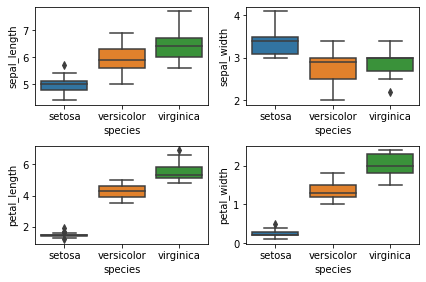

In [42]:
fig, axs = plt.subplots(2, 2)
sns.boxplot(x = 'species', y = 'sepal_length', data = train,  order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width',  data = train,  order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = train,  order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width',  data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

## 3.3. Pair plot

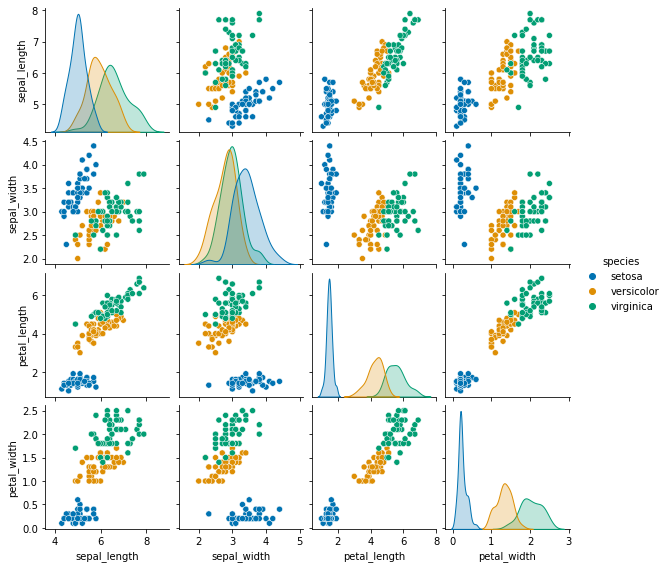

In [43]:
sns.pairplot(data, hue="species", height = 2, palette = 'colorblind');
plt.show()


- Not all distribuitons are gaussianes

- Si sont superposse cest pas bonee pour des classification

- Les meilleurs pour classifiction sont petal width et petal_lenget parce que sont distribuitons pas superposses.  

- Ils sont des characterisitics discriminants

- Le sepal length facilement permet avec une classificataeur linear separer setosa - by using petal length we can 
  separate iris-setosa

- by using sepal length,sepal width we can’t do anything because it’s all messed up and we can’t separate the flowers

- petal width iris setosa is not distributed properly

- so we are using the petal length as feature to separate at least the iris setosa.

- if 0≤petal_length≤2 and 0≤petal_width≤0.7then setosa

- if 2≤petal_lenght≤5.2 and 1≤petal_length≤1.7 then versicolor and else virginica


## 3.4. Variance Treshold methode

Variance threshold method removes features whose variance below a pre-defined cutoff value. It is based on the notion that features that do not vary much within themselves have low predictive power. The main weakness of variance threshold is that it does not consider the relationship of input features with the output feature.

It should be noted that, before performing variance thresholding, all features should be standardized so they will have the same scale.

Scikit-learn provides VarianceThreshold function to perform variance threshold method.

We can create a selector instance of VarianceThreshold and use it to only select features with a variance higher than 0.1.

In [44]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=(0.1))
selector.fit_transform(X_train)

for feature in zip(fn, selector.variances_):
    print(feature)

('sepal_length', 0.6329528888888889)
('sepal_width', 0.15315555555555552)
('petal_length', 2.9539555555555554)
('petal_width', 0.5714595555555556)


High values of variance means this characteristics are highly discriminant, But this conclusion its not really exact when variables are different scales, on dois normaliser/standarizer les donnes.


### 3.4.1.  With non standarized ni normalized data - Original Data training

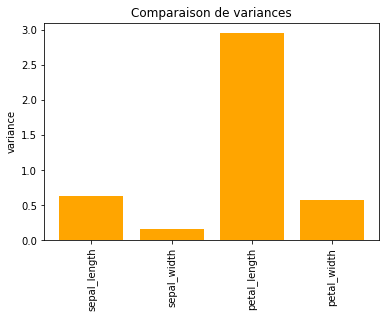

In [45]:
plt.bar(x=fn, height=selector.variances_, color='orange')
plt.xticks(rotation='vertical')
plt.ylabel('variance')
plt.title('Comparaison de variances')
plt.show()

In [46]:

#Optional  enlever bizarre data si necessaire #Perform tresholding variance
selector = VarianceThreshold(threshold=0.2)
X_train_new = selector.fit_transform(X_train)
print('Number of features before variances thresholding: {}'.format(X_train.shape[1]))
print('Number of features after variances thresholding: {}'.format(X_train_new.shape[1]))


Number of features before variances thresholding: 4
Number of features after variances thresholding: 3


## 3.5.   Représentez la dispersion de la variable Sepal width en fonction de Sepal length pour l’ensemble des données d’entrainement et l’ensemble des données de test. Utilisez des marker différents.

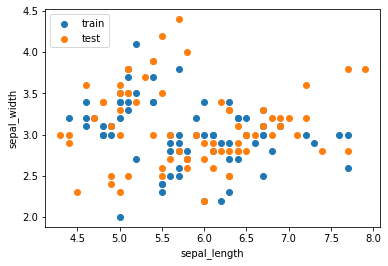

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train [['sepal_length']], train [['sepal_width']], label='train')
ax1.scatter(test [['sepal_length']], test [['sepal_width']], label='test')
plt.legend(loc='upper left');
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

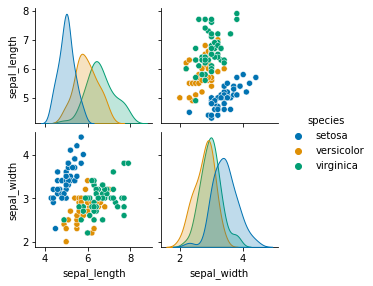

In [48]:
sns.pairplot(data[['sepal_length','sepal_width', 'species']], hue="species", height = 2, palette = 'colorblind');
plt.show()

# 4. SVM - Support Vector Machihes - LinearSVC

In [49]:
# In order to do references to feature data Test and Training easily we create Matrix of charactersitics
X_train = train [['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_train = train[['species']]

X_test = test[['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_test = test.species

fn = ['sepal_length','sepal_width', 'petal_length','petal_width'] #Features ou characteristics



### 4.1. Normalised data

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
selector = VarianceThreshold()
X_train_tresholding = selector.fit_transform(X_train_normalized)


<BarContainer object of 4 artists>

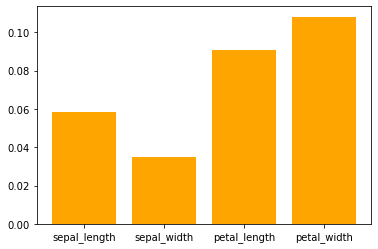

In [51]:
plt.bar(x=fn, height=selector.variances_, color='orange')


#  <font color='blue' > 4.2 Modelisation avec tous le variables  </font> 

In [52]:
# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
# https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/


### 4.2.1  Model A:  All variables using SVC - Support Vector Classifier

In [59]:
from sklearn.svm import SVC

modelA1=SVC(C=1, kernel='linear', random_state=10) 
modelA1.fit(X_train, np.array(Y_train).ravel())

                    # gamma{‘scale’, ‘auto’} or float, default=’scale’ Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
                    # kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ 
                    # will use a linear hyperplane (a line in the case of 2D data).


SVC(C=1, kernel='linear', random_state=10)

In [60]:
## Predictions from the trained model

pred=modelA1.predict(X_test)


In [61]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test,pred))

[[25  0  0]
 [ 0 24  1]
 [ 0  0 25]]


In [62]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       1.00      0.96      0.98        25
   virginica       0.96      1.00      0.98        25

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [63]:
#calcule de précision
print(modelA1.score( X_test, Y_test))

0.9866666666666667


In [64]:
modelA1.coef_[0]

array([-0.27649747,  0.32258038, -0.8294924 , -0.23041456])

### 4.2.2.  Model A:  All variables using LinearSVC

https://www.cours-gratuit.com/tutoriel-python/tutoriel-python-matriser-les-svm-avec-scikit-learn
    

In [66]:
### Methode 2

from sklearn.svm import LinearSVC

# On fixe le paramètre de régularisation C=1.0
# On fixe random state à 10
modelA2_linearSVC = LinearSVC( dual = False, random_state = 10, penalty = 'l1', tol = 1e-3, C=1.0)
modelA2_linearSVC.fit( X_train, np.array(Y_train).ravel())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(dual=False, penalty='l1', random_state=10, tol=0.001)

In [67]:
## Predictions from the trained model

pred=modelA2_linearSVC.predict(X_test)

In [68]:
modelA2_linearSVC.coef_[0]

array([ 0.        ,  0.66719727, -0.74837154,  0.        ])

# 5.  Evaluation de modele

In [69]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test,pred))

[[25  0  0]
 [ 0 22  3]
 [ 0  1 24]]


In [70]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.96      0.88      0.92        25
   virginica       0.89      0.96      0.92        25

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [71]:
#calcule de précision - Taux de classification
print(modelA2_linearSVC.score( X_test, Y_test))

0.9466666666666667


In [74]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
12,4.8,3.0,1.4,0.1
99,5.7,2.8,4.1,1.3
7,5.0,3.4,1.5,0.2
136,6.3,3.4,5.6,2.4
86,6.7,3.1,4.7,1.5
104,6.5,3.0,5.8,2.2
101,5.8,2.7,5.1,1.9
145,6.7,3.0,5.2,2.3
97,6.2,2.9,4.3,1.3
27,5.2,3.5,1.5,0.2


# 7.  Frontiere de desicion

In [213]:
# Fait pour 2 characteristiques

# 9.  Comparaison SVC, LinearSVC

They are just different implementations of the same algorithm. The SVM module (SVC, NuSVC, etc) is a wrapper around the libsvm library and supports different kernels while LinearSVC is based on liblinear and only supports a linear kernel. So:

SVC(kernel = 'linear') is in theory "equivalent" to: LinearSVC()
Because the implementations are different in practice you will get different results, the most important ones being that LinearSVC only supports a linear kernel, is faster and can scale a lot better.

# <font color='blue' > 10. Model SVC - En utilisant 2 characteristiques </font>

In [214]:
# In order to do references to feature data Test and Training easily we create Matrix of charactersitics
X_train = train [['sepal_length','sepal_width']]  #['sepal_length','sepal_width', 'petal_length','petal_width']
Y_train = train['species']

X_test = test[['sepal_length','sepal_width']]
Y_test =  test['species']

fn = ['sepal_length','sepal_width'] #Features ou characteristics



In [215]:
from sklearn.svm import SVC

# https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/
    
    
modelA1=SVC(gamma=0.001, C=100.0, kernel='linear', random_state=10)
modelA1.fit(X_train, np.array(Y_train).ravel())

## Predictions from the trained model

pred=modelA1.predict(X_test)


In [216]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test,pred))

[[24  1  0]
 [ 0 18  7]
 [ 0  3 22]]


In [217]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

      setosa       1.00      0.96      0.98        25
  versicolor       0.82      0.72      0.77        25
   virginica       0.76      0.88      0.81        25

    accuracy                           0.85        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.86      0.85      0.85        75



In [218]:
print(modelA1.score( X_test, Y_test)) #Taux de classification


0.8533333333333334


In [219]:
w1 = modelA1.coef_[0]
w1


array([-3.33165913,  3.80759377])

In [220]:
b1 = modelA1.intercept_[0]
b1

6.044636298822832

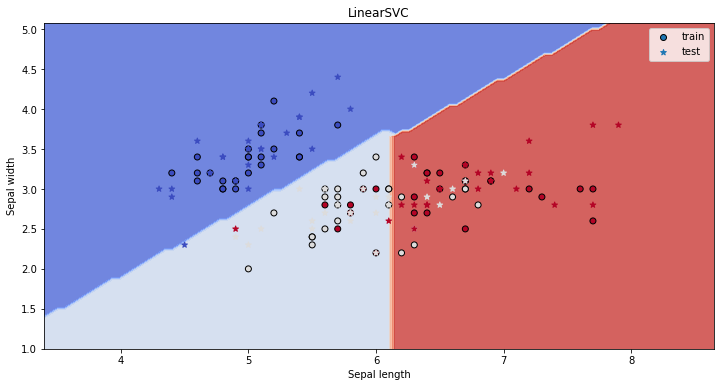

In [237]:
# Créer la surface de décision discretisée
x_min, x_max = X_train['sepal_length'].min() - 1, X_train['sepal_length'].max() + 1
y_min, y_max = X_train['sepal_width'].min() - 1, X_train['sepal_width'].max() + 1

# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


plt.figure(figsize=(12, 6))

# Surface de décision linéaire
Z = modelA1.predict(np.c_[xx.ravel(), yy.ravel()])

#Regions
Zcolor = pd.DataFrame(Z, columns=['a'])
Zcolor.loc[Zcolor.a =='setosa']=0
Zcolor.loc[Zcolor.a =='versicolor']=1
Zcolor.loc[Zcolor.a =='virginica']=2
Z = ZZ.to_numpy().reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

#Train data
Ytr_color = pd.DataFrame(Y_train, columns=['species'])
Ytr_color.loc[Ytr_color.species =='setosa']=0
Ytr_color.loc[Ytr_color.species =='versicolor']=1
Ytr_color.loc[Ytr_color.species =='virginica']=2
Ytr_color = Ytr_color.to_numpy()
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], label="train", edgecolors='k', c=Ytr_train, cmap=plt.cm.coolwarm)

#Test data
Yt_color = pd.DataFrame(Y_test, columns=['species'])
Yt_color.loc[Y_test =='setosa']=0
Yt_color.loc[Y_test =='versicolor']=1
Yt_color.loc[Y_test =='virginica']=2
Yt_color = Yt_color.to_numpy()
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], label="test", marker='*', c=Yt_color, cmap=plt.cm.coolwarm)


plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")
plt.legend()
plt.show()



# 10.1.  Model avec les 2 variables avec la variance normalise la plus grande

In [192]:
# In order to do references to feature data Test and Training easily we create Matrix of charactersitics
X_train = train [['petal_length','petal_width']]  #['sepal_length','sepal_width', 'petal_length','petal_width']
Y_train = train[['species']]

X_test = test[['petal_length','petal_width']]
Y_test = test.species

fn = ['petal_length','petal_width'] #Features ou characteristics

from sklearn.svm import SVC

# https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/
    
    
modelA2=SVC(gamma=0.001, C=100.0, kernel='linear', random_state=10)
modelA2.fit(X_train, np.array(Y_train).ravel())

## Predictions from the trained model

pred=modelA2.predict(X_test)

# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test,pred))

print(classification_report(Y_test, pred))

print(modelA2.score( X_test, Y_test))

[[25  0  0]
 [ 0 24  1]
 [ 0  3 22]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.89      0.96      0.92        25
   virginica       0.96      0.88      0.92        25

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

0.9466666666666667


In [232]:
w2 = modelA2.coef_[0]
w2


array([-1.09589056, -0.41095896])

In [233]:
b2 = modelA2.intercept_[0]

In [ ]:
kernel='linear'
# svc = svm.SVC(kernel=kernel).fit(X, y)
plotSVC('kernel=' + str(kernel), v1, v2)

In [ ]:
kernels = [‘linear’, ‘rbf’, ‘poly’]
for kernel in kernels:
    svc = svm.SVC(kernel=kernel).fit(X, y)
    plotSVC(‘kernel=’ + str(kernel))

# 12. Comparaison entre modeliser avec 2 ou 4 characteristiques

Dans les deux cas, on obtient des classifieurs linéaires qui produisent des frontières de décision linéaires. Ces frontières sont légèrement différentes.
L'utilisation des quatre caractéristiques permet d'améliorer les taux de classifications (80% par rapport à 92% )

# EXCERCISE 2

# 1.  Split  30% TEST

In [238]:
#Repartition des donnes - I have to do that after preprocessing and imputation null values

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.3, stratify = data['species'], random_state = 10) #40% data for tests

# In order to do references to feature data Test and Training easily we create Matrix of charactersitics

X_train = train [['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_train = train[['species']]

X_test = test[['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_test = test.species

fn = ['sepal_length','sepal_width', 'petal_length','petal_width'] #Features ou characteristics

# 2.  Desicicion Trees


In [239]:
# Construction des arbres de desicion
# https://medium.com/intuitive-machine-learning/decision-trees-concepts-with-iris-dataset-304648b961f5 - see pdf

from sklearn import tree
desicionTree = tree.DecisionTreeClassifier(max_depth =3, random_state = 1)
#desicionTree = tree.DecisionTreeClassifier(random_state = 1)
desicionTree.fit(X_train, Y_train)

#max_depth: The maximum depth of the tree. If None, then nodes are expanded until all 
#           leaves are pure or until all leaves contain less than min_samples_split samples.

# random_state has to be fixed to an integer

DecisionTreeClassifier(max_depth=3, random_state=1)

## 2.1. Predict and Evaluate tree presicion

In [240]:
# Test de l'arbre de descion

from sklearn import metrics

Y_prediction = desicionTree.predict(X_test)
print('Presicion tree: ', "{:.3f}".format(metrics.accuracy_score(Y_prediction, Y_test)))

# Les characteristics plus pertinant sont tres haut dans l'arbre
# Les nodes intermediares sont desicion nodes.
# Les nodes finaux sont leaf nodes.

#You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.
     

Presicion tree:  0.978


[Text(209.25, 380.52, 'petal_width <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(279.0, 271.8, 'petal_width <= 1.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(139.5, 163.07999999999998, 'petal_length <= 4.95\ngini = 0.224\nsamples = 39\nvalue = [0, 34, 5]\nclass = versicolor'),
 Text(69.75, 54.360000000000014, 'gini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = versicolor'),
 Text(209.25, 54.360000000000014, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(418.5, 163.07999999999998, 'petal_length <= 4.85\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]\nclass = virginica'),
 Text(348.75, 54.360000000000014, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(488.25, 54.360000000000014, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]\nclass = virginica')]

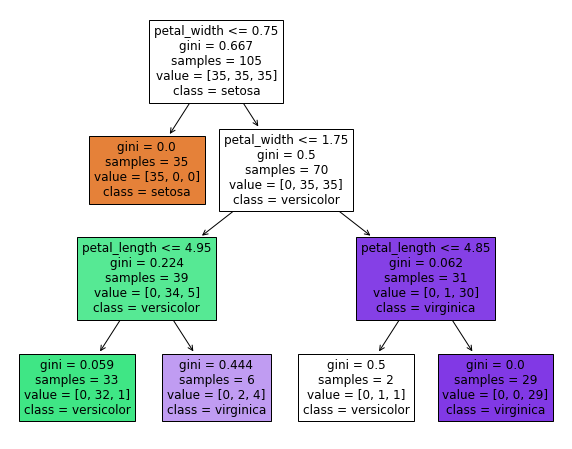

In [241]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize = (10,8))
plot_tree(desicionTree, feature_names = fn, class_names = cn, filled = True)

# 3. Evaluation de modele

In [242]:
from sklearn.metrics import confusion_matrix

species = Y_test
predictions = np.array(Y_prediction)

#La matriz de confusion permite evaluar la presicion del modelo.
confusion_matrix(species, predictions)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

True Positive:
Interpretation: You predicted positive and it’s true.

You predicted that a woman is pregnant and she actually is.
True Negative:
Interpretation: You predicted negative and it’s true.

You predicted that a man is not pregnant and he actually is not.
False Positive: (Type 1 Error)
Interpretation: You predicted positive and it’s false.

You predicted that a man is pregnant but he actually is not.
False Negative: (Type 2 Error)
Interpretation: You predicted negative and it’s false.

You predicted that a woman is not pregnant but she actually is.

That being said, the numbers on the diagonal of the confusion matrix correspond to correct predictions. When there are more than two potential outcomes, we simply extend the number of columns and rows in the confusion matrix.

https://www.python-course.eu/Decision_Trees.php

# 4. MODEL USING NUMERO DE FEUILLLES = 20 = max_leaf_nodes

In [243]:
# Construction des arbres de desicion
# https://medium.com/intuitive-machine-learning/decision-trees-concepts-with-iris-dataset-304648b961f5 - see pdf

from sklearn import tree
desicionTree = tree.DecisionTreeClassifier(max_leaf_nodes =20, random_state = 1)
#desicionTree = tree.DecisionTreeClassifier(random_state = 1)
desicionTree.fit(X_train, Y_train)

#max_depth: The maximum depth of the tree. If None, then nodes are expanded until all 
#           leaves are pure or until all leaves contain less than min_samples_split samples.

# random_state has to be fixed to an integer

DecisionTreeClassifier(max_leaf_nodes=20, random_state=1)

In [244]:
# Test de l'arbre de descion

from sklearn import metrics

Y_prediction = desicionTree.predict(X_test)
print('Presicion tree: ', "{:.3f}".format(metrics.accuracy_score(Y_prediction, Y_test)))

# Les characteristics plus pertinant sont tres haut dans l'arbre
# Les nodes intermediares sont desicion nodes.
# Les nodes finaux sont leaf nodes.

#You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.
     

Presicion tree:  1.000


[Text(279.0, 398.64, 'petal_width <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(236.07692307692307, 326.15999999999997, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(321.9230769230769, 326.15999999999997, 'petal_width <= 1.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(171.69230769230768, 253.67999999999998, 'petal_length <= 4.95\ngini = 0.224\nsamples = 39\nvalue = [0, 34, 5]\nclass = versicolor'),
 Text(85.84615384615384, 181.2, 'petal_width <= 1.65\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = versicolor'),
 Text(42.92307692307692, 108.71999999999997, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(128.76923076923077, 108.71999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(257.53846153846155, 181.2, 'petal_width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(214.61538461538458, 108.

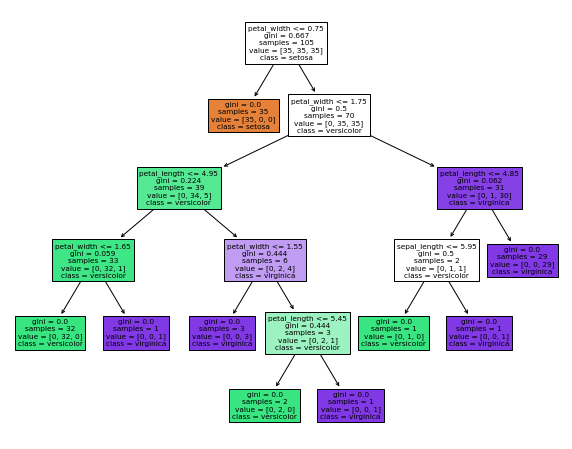

In [245]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize = (10,8))
plot_tree(desicionTree, feature_names = fn, class_names = cn, filled = True)

# 5. Evaluation de model

In [246]:
from sklearn.metrics import confusion_matrix

species = Y_test
predictions = np.array(Y_prediction)

#La matriz de confusion permite evaluar la presicion del modelo.
confusion_matrix(species, predictions)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]], dtype=int64)

In [247]:
print(classification_report(Y_test, Y_prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# 6. Répartir l’ensemble de données en entrainement (5% de l’ensemble desdonnées) et test (95% de l’ensemble des données).

In [248]:
#Repartition des donnes - I have to do that after preprocessing and imputation null values

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.95, stratify = data['species'], random_state = 10) #40% data for tests

# In order to do references to feature data Test and Training easily we create Matrix of charactersitics

X_train = train [['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_train = train[['species']]

X_test = test[['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_test = test.species

fn = ['sepal_length','sepal_width', 'petal_length','petal_width'] #Features ou characteristics


## 6.1.  Calculez le taux de classification pour les profondeur 1 à 7

In [249]:

# Model

from sklearn import tree
from sklearn import metrics

for i in range(1,7):
    desicionTree = tree.DecisionTreeClassifier(max_depth =i, random_state = 1)
    desicionTree.fit(X_train, Y_train)

    # Prediction Test
    Y_prediction = desicionTree.predict(X_test)

    # Test de l'arbre de descion
    print('Presicion tree: ', "{:.3f}".format(metrics.accuracy_score(Y_prediction, Y_test)))

# Les characteristics plus pertinant sont tres haut dans l'arbre
# Les nodes intermediares sont desicion nodes.
# Les nodes finaux sont leaf nodes.

# You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.


Presicion tree:  0.664
Presicion tree:  0.776
Presicion tree:  0.776
Presicion tree:  0.776
Presicion tree:  0.776
Presicion tree:  0.776


## 7. Répartir l’ensemble de données en entrainement (5% de l’ensemble des données) et test (95% de l’ensemble des données)

In [250]:
#Repartition des donnes - I have to do that after preprocessing and imputation null values

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.95, stratify = data['species'], random_state = 10) #40% data for tests

# In order to do references to feature data Test and Training easily we create Matrix of charactersitics

X_train = train [['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_train = train[['species']]

X_test = test[['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_test = test.species

fn = ['sepal_length','sepal_width', 'petal_length','petal_width'] #Features ou characteristics


## 7.1.  Calculez le taux de classification pour un nombre total de feuille de 2, 3, 5, 10, 15, 20

In [251]:

# Model

from sklearn import tree
from sklearn import metrics

for i in [2, 3, 5, 10, 15, 20, 25]:
    desicionTree = tree.DecisionTreeClassifier(max_leaf_nodes =i, random_state = 1)
    desicionTree.fit(X_train, Y_train)

    # Prediction Test
    Y_prediction = desicionTree.predict(X_test)

    # Test de l'arbre de descion
    print('Presicion tree: ', "{:.3f}".format(metrics.accuracy_score(Y_prediction, Y_test)))

# Les characteristics plus pertinant sont tres haut dans l'arbre
# Les nodes intermediares sont desicion nodes.
# Les nodes finaux sont leaf nodes.

# You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.


Presicion tree:  0.664
Presicion tree:  0.776
Presicion tree:  0.776
Presicion tree:  0.776
Presicion tree:  0.776
Presicion tree:  0.776
Presicion tree:  0.776
